In [489]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import *
from sklearn.gaussian_process.kernels import ConstantKernel as C

In [490]:
def f(xx):
    """The function to predict."""
    return 6.5*xx**2 + (3+np.random.randn())

# Observations
y = f(X).ravel()

#print X
#print y

In [491]:
# Make x:
x = np.atleast_2d(np.linspace(0, 10, 100)).T

In [506]:
# Make kernel

# Radial basis functions:
# ------------
#kernel = C(constant_value=1.0, constant_value_bounds=(0.0, 1.0)) * RBF(length_scale=0.5, length_scale_bounds=(0.0, 10.0))
#kernel = C(constant_value=1.0, constant_value_bounds=(0, 10.0))# * RBF(length_scale=0.5, length_scale_bounds=(0.0, 10.0)) + RBF(length_scale=2.0, length_scale_bounds=(0.0, 10.0))
#kernel = C(constant_value=0.5, constant_value_bounds=(0.0, 1.0)) * RBF(length_scale=1)

## Linear kernel (not sure what constant_value_bounds does)
# ------------
#kernel = C(constant_value=0.5, constant_value_bounds=(0.0, 1.0))
#kernel = C(constant_value=0.5)

## Dot product (...2nd degree???)
# ------------
#kernel = C(constant_value=0.5, constant_value_bounds=(0.0, 1.0)) * (DotProduct(sigma_0=10.0, sigma_0_bounds=(0.0, 20.0)))**2

## RBF and kernel function:
# ------------
#kernel = RBF(length_scale=100.0, length_scale_bounds=(1e-2, 1e3)) + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e+1))

## Dot product kernel
# ------------
#kernel = (DotProduct(sigma_0=1.0, sigma_0_bounds=(0.0, 10.0))**2)
#kernel = C(constant_value=1.0, constant_value_bounds=(0.0, 10.0)) * DotProduct(sigma_0=1.0, sigma_0_bounds=(0.5, 10.0))**2



#kernel = 34.4**2 * RBF(length_scale=41.8)
#+ 3.27**2 * RBF(length_scale=180) * ExpSineSquared(length_scale=1.44,
#                                                   periodicity=1)
#+ 0.446**2 * RationalQuadratic(alpha=17.7, length_scale=0.957)
#+ 0.197**2 * RBF(length_scale=0.138) + WhiteKernel(noise_level=0.0336)

kernel = ConstantKernel(0.1, (0.001, 100.0)) * (DotProduct(sigma_0=0.1, sigma_0_bounds=(0.0, 100.0)) ** 2) \
       + ConstantKernel(0.1, (0.001, 100.0)) * RationalQuadratic(alpha=1.0, length_scale=1.0) \
       + ConstantKernel(0.1, (0.001, 100.0))

# Make Gaussian process and prediction and sigma:
gp = GaussianProcessRegressor(kernel=kernel)

print "Before fit:"
print kernel

gp.fit(X, y)
y_pred, sigma = gp.predict(x, return_std=True)

print "After fit:"
print gp.kernel_


Before fit:
0.316**2 * DotProduct(sigma_0=0.1) ** 2 + 0.316**2 * RationalQuadratic(alpha=1, length_scale=1) + 0.316**2
After fit:
5.62**2 * DotProduct(sigma_0=0.0157) ** 2 + 0.543**2 * RationalQuadratic(alpha=0.647, length_scale=953) + 2.81**2


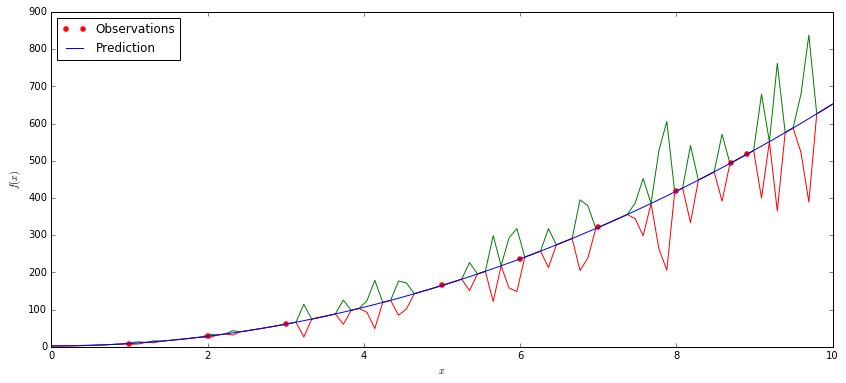

In [507]:
fig = plt.figure(figsize=(14,6))

plt.plot(x, y_pred + sigma, 'g-')
plt.plot(x, y_pred - sigma, 'r-')

plt.plot(X, y, 'r.', markersize=10, label=u'Observations')
plt.plot(x, y_pred, 'b-', label=u'Prediction')

#plt.fill(np.concatenate([x, x[::-1]]),
#         np.concatenate([y_pred - np.ones(1000)*15, #sigma,
#                        (y_pred + np.ones(1000)*15)[::-1]]), #sigma)[::-1]]),
#         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')

#plt.xlim([0,2])
#plt.ylim([1,2])

plt.legend(loc='best')
plt.show()